We evaluate the theoretical values derived for various experiment designs.

In [2]:
from pedeval.experiment_design import (
    BinaryResponseRateED, AllSampleBRRED, QualifiedOnlyBRRED)
from pedeval.evaluation import (
    BootstrapMeanEvaluation, EDActualEffectEvaluation, EDMDESizeEvaluation) 
from pedeval.util import find_all_bootstrap_mean_evaluations
import numpy as np
import time
import pickle
from typing import List

In [3]:
np.random.seed(int(time.time()))

In [4]:
def save_evaluation_collection(eval_collection: List[BootstrapMeanEvaluation], 
                               in_dir: str = './output',
                               expt_design_name: str = 'default',
                               quantity_name: str = 'default') -> None:
    """
    Save given `eval_collection` as a pickle file in `in_dir`
    :param eval_collection: List of evaluations
    :param in_dir: Output directory
    :return: None
    """
    if eval_collection is None or len(eval_collection) == 0:
        return

    file_path = f"{in_dir}/{expt_design_name}_{quantity_name}_{int(time.time())}.pickle"
    pickle_file = open(file_path, 'wb')
    pickle.dump(eval_collection, pickle_file)

    print(f"The test collection is saved at {file_path}.")

In [ ]:
def unrealistic_experiment_design_params(experiment_design: ExperimentDesign,
                                         r: int) -> bool:
    """
    
    """

# Design 2 (Actual Effect)

In [4]:
N_RUN = 1000

design2_actual_effect_evaluations = []
for run in range(0, N_RUN):
    print(f"Processing run {run+1}/{N_RUN}...", end="\r")

    design2 = (
        AllSampleBRRED(
            p_C0=np.random.uniform(0, 1),
            p_C1=np.random.uniform(0, 1),
            p_I1=np.random.uniform(0, 1),
            p_C2=np.random.uniform(0, 1),
            p_I2=np.random.uniform(0, 1),
            p_C3=np.random.uniform(0, 1),
            p_Iphi=np.random.uniform(0, 1),
            p_Ipsi=np.random.uniform(0, 1),
            n_0=int(50 * 10**np.random.uniform(0, 3)),
            n_1=int(50 * 10**np.random.uniform(0, 3)),
            n_2=int(50 * 10**np.random.uniform(0, 3)),
            n_3=int(50 * 10**np.random.uniform(0, 3)),
            alpha=0.05, pi_min=0.8
        )
    )

    design2_actual_effect_evaluation = (
        EDActualEffectEvaluation(design2, n_init_samples=1000, n_bootstrap_mean_samples=200))
    design2_actual_effect_evaluation.run()
    design2_actual_effect_evaluations.append(design2_actual_effect_evaluation)

save_evaluation_collection(design2_actual_effect_evaluations, 
                           in_dir='./output', expt_design_name="all_sample",
                           quantity_name="AE")

The test collection is saved at ./output/all_sample_AE_1591749592.pickle.


In [5]:
np.array([e.theoretical_value_within_centred_CI(0.05) 
          for e in design2_actual_effect_evaluations]).sum()

930

# Design 2 (MDE Size)

Warning: Long run-time process

In [8]:
N_RUN = 10

design2_mde_size_evaluations = []
for run in range(0, N_RUN):
    print(f"Processing run {run+1}/{N_RUN}...", end="\r")

    design2 = (
        AllSampleBRRED(
            p_C0=np.random.uniform(0, 1),
            p_C1=np.random.uniform(0, 1),
            p_I1=np.random.uniform(0, 1),
            p_C2=np.random.uniform(0, 1),
            p_I2=np.random.uniform(0, 1),
            p_C3=np.random.uniform(0, 1),
            p_Iphi=np.random.uniform(0, 1),
            p_Ipsi=np.random.uniform(0, 1),
            n_0=int(50 * 10**np.random.uniform(0, 3)),
            n_1=int(50 * 10**np.random.uniform(0, 3)),
            n_2=int(50 * 10**np.random.uniform(0, 3)),
            n_3=int(50 * 10**np.random.uniform(0, 3)),
            alpha=0.05, pi_min=0.8
        )
    )

    design2_mde_size_evaluation = (
        EDMDESizeEvaluation(design2, n_init_samples=100, n_bootstrap_mean_samples=1000))
    design2_mde_size_evaluation.run(verbose=True)
    design2_mde_size_evaluations.append(design2_mde_size_evaluation)

save_evaluation_collection(design2_mde_size_evaluations, 
                           in_dir='./output', expt_design_name="all_sample",
                           quantity_name="MDES")

The test collection is saved at ./output/all_sample_MDES_1591826658.pickle.


In [32]:
design3_mde_size_evaluations = \
find_all_bootstrap_mean_evaluations(in_dir='./output', expt_design_name='normal_qualifiedonly', quantity_name='MDES')

np.array([e.theoretical_value_within_centred_CI(0.025) 
          for e in design3_mde_size_evaluations]).sum()

2

1447 1062 277 3898
0.17037402551716993
[0.16514229638403363, 0.16231821100311622, 0.17351577687089298, 0.16971131751039614, 0.16810614863979087, 0.1691359011554241, 0.17009551573576226, 0.16983408741761621, 0.16728097816233248, 0.17198368503385342, 0.17212130570276427, 0.16913102953108966, 0.16435201849317574, 0.1726053771047816, 0.17023134645176724, 0.16643085512129535, 0.16458069168900624, 0.1636220727304086, 0.16833213852831827, 0.17260072666449874, 0.1734973786095235, 0.16301502874092078, 0.17083200915082972, 0.17634976387511506, 0.17525454672934465, 0.16788205492310496, 0.17720582473964494, 0.17935170742007872, 0.16804893221406744, 0.1670077375809231, 0.16528837797241355, 0.17080902848745128, 0.17046158013159357, 0.16992852530794472, 0.16495508587167992, 0.17085485162246863, 0.16687325795421984, 0.164510567675243, 0.17615556874464502, 0.16863295272559473, 0.16400817780973057, 0.16703880620885314, 0.1710475017861302, 0.1680456527415621, 0.1634899225849972, 0.16786078495996323, 0.16

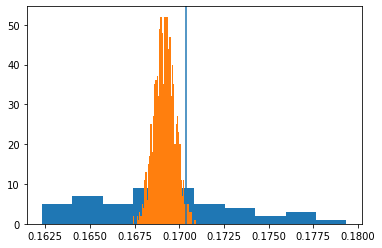

In [29]:
from matplotlib import pyplot as plt
e= design3_mde_size_evaluations[1]
ee=e.experiment_design
print(ee.n_0, ee.n_1, ee.n_2, ee.n_3)
# print(ee.p_C0, ee.p_I1, ee.p_C2, ee.p_Iphi)
# print(ee.p_C0, ee.p_C1, ee.p_I2, ee.p_Ipsi)
print(ee.theoretical_mde_size())
print(e.initial_samples)
plt.hist(e.initial_samples)
plt.hist(e.bootstrap_mean_samples, bins=50)
plt.axvline(e.get_theoretical_value())
plt.show()

# Design 3 (Actual effect)

In [6]:
N_RUN = 1000

design3_actual_effect_evaluations = []
for run in range(0, N_RUN):
    print(f"Processing run {run+1}/{N_RUN}...", end="\r")

    design3 = (
        QualifiedOnlyBRRED(
            p_C0=np.random.uniform(0, 1),
            p_C1=np.random.uniform(0, 1),
            p_I1=np.random.uniform(0, 1),
            p_C2=np.random.uniform(0, 1),
            p_I2=np.random.uniform(0, 1),
            p_C3=np.random.uniform(0, 1),
            p_Iphi=np.random.uniform(0, 1),
            p_Ipsi=np.random.uniform(0, 1),
            n_0=int(50 * 10**np.random.uniform(0, 3)),
            n_1=int(50 * 10**np.random.uniform(0, 3)),
            n_2=int(50 * 10**np.random.uniform(0, 3)),
            n_3=int(50 * 10**np.random.uniform(0, 3)),
            alpha=0.05, pi_min=0.8
        )
    )

    design3_actual_effect_evaluation = (
        EDActualEffectEvaluation(design3, n_init_samples=1000, n_bootstrap_mean_samples=200))
    design3_actual_effect_evaluation.run()
    design3_actual_effect_evaluations.append(design3_actual_effect_evaluation)

save_evaluation_collection(design3_actual_effect_evaluations, 
                           in_dir='./output', expt_design_name="qualified_only",
                           quantity_name="AE")

The test collection is saved at ./output/qualified_only_AE_1591750472.pickle.


In [7]:
np.array([e.theoretical_value_within_centred_CI(0.05) 
          for e in design3_actual_effect_evaluations]).sum()

941

# Design 3 (MDE Size)

Warning: Long run-time process

In [167]:
N_RUN = 1

design3_mde_size_evaluations = []
for run in range(0, N_RUN):
    print(f"Processing run {run+1}/{N_RUN}...")

    design3 = (
        QualifiedOnlyBRRED(
            p_C0=np.random.uniform(0, 1),
            p_C1=np.random.uniform(0, 1),
            p_I1=np.random.uniform(0, 1),
            p_C2=np.random.uniform(0, 1),
            p_I2=np.random.uniform(0, 1),
            p_C3=np.random.uniform(0, 1),
            p_Iphi=np.random.uniform(0, 1),
            p_Ipsi=np.random.uniform(0, 1),
            n_0=int(50 * 10**np.random.uniform(0, 3)),
            n_1=int(50 * 10**np.random.uniform(0, 3)),
            n_2=int(50 * 10**np.random.uniform(0, 3)),
            n_3=int(50 * 10**np.random.uniform(0, 3)),
            alpha=0.05, pi_min=0.8
        )
    )

    design3_mde_size_evaluation = (
        EDMDESizeEvaluation(design3, n_init_samples=50, n_bootstrap_mean_samples=1000))
    design3_mde_size_evaluation.run(verbose=True)
    design3_mde_size_evaluations.append(design3_mde_size_evaluation)

save_evaluation_collection(design3_mde_size_evaluations, 
                           in_dir='./output', expt_design_name="qualified_only",
                           quantity_name="MDES")

Processing run 1/1...
The test collection is saved at ./output/qualified_only_MDES_1591884590.pickle.


In [169]:
np.array([e.theoretical_value_within_centred_CI(0.05) 
          for e in design3_mde_size_evaluations]).sum()

1

174 778 32280 2553
0.2922551508826693 0.0594397435646552 0.48439786597109213 0.26191791782453644
0.2922551508826693 0.7862663670631802 0.5907020295720418 0.8428742668664274
0.014451868001271259


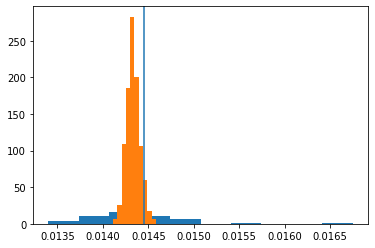

In [170]:
from matplotlib import pyplot as plt
e= design3_mde_size_evaluation
ee=e.experiment_design
print(ee.n_0, ee.n_1, ee.n_2, ee.n_3)
print(ee.p_C0, ee.p_I1, ee.p_C2, ee.p_Iphi)
print(ee.p_C0, ee.p_C1, ee.p_I2, ee.p_Ipsi)
print(ee.theoretical_mde_size())
plt.hist(design3_mde_size_evaluation.initial_samples)
plt.hist(design3_mde_size_evaluation.bootstrap_mean_samples)
plt.axvline(design3_mde_size_evaluation.get_theoretical_value())
plt.show()

In [72]:
ee._simulated_power(0.035,
                    0.023761,
                    500)

0.8160000000000001

In [156]:
group_a_mean_responses = []
group_b_mean_responses = []
null_metric_samples = []

# Metric distribution under null hypothesis
for sample in range(0, 1000):
    group_a_responses = ee.get_group_a_samples()
    group_b_responses_null = ee.get_group_b_samples_by_effect(effect=0)

    group_a_mean_responses.append(np.mean(group_a_responses))
    group_b_mean_responses.append(np.mean(group_b_responses_null))
    null_metric_samples.append(np.mean(group_b_responses_null) - np.mean(group_a_responses))

null_critical_value = np.percentile(null_metric_samples, (1 - ee.alpha / 2) * 100)

In [162]:
(2 * (ee.n_1*ee.p_I1*(1-ee.p_I1) + ee.n_2*ee.p_C2*(1-ee.p_C2) + ee.n_3*ee.p_Iphi*(1-ee.p_Iphi)) / 
 (ee.n_1 + ee.n_2 + ee.n_3) ** 2)

8.371860105057852e-05

In [163]:
(2 * (ee.n_1*ee.p_C1*(1-ee.p_C1) + ee.n_2*ee.p_I2*(1-ee.p_I2) + ee.n_3*ee.p_Ipsi*(1-ee.p_Ipsi)) / 
 (ee.n_1 + ee.n_2 + ee.n_3) ** 2)

0.00018898772269172336

In [157]:
(ee.theoretical_mde_size() / 2.8) ** 2

0.00027301519615431056

In [158]:
print(np.var(group_a_mean_responses))
print(np.var(group_b_mean_responses))

8.517883064365827e-05
8.574240570162124e-05


In [129]:
np.cov(group_a_mean_responses, group_b_mean_responses)

array([[ 8.37495877e-05, -2.49915130e-06],
       [-2.49915130e-06,  8.48290932e-05]])

In [137]:
np.var(null_metric_samples)

0.0001600841685650416

(array([ 1.,  0.,  0.,  0.,  1.,  1.,  4.,  2.,  4.,  2.,  4.,  7., 13.,
         4.,  8., 11., 33., 30., 20., 51., 51., 28., 67., 34., 63., 64.,
        30., 66., 33., 49., 51., 21., 46., 37., 24., 30., 16., 16., 25.,
         5., 15., 15.,  3.,  9.,  2.,  2.,  0.,  0.,  1.,  1.]),
 array([-0.04437564, -0.04270382, -0.04103199, -0.03936017, -0.03768834,
        -0.03601651, -0.03434469, -0.03267286, -0.03100103, -0.02932921,
        -0.02765738, -0.02598555, -0.02431373, -0.0226419 , -0.02097007,
        -0.01929825, -0.01762642, -0.01595459, -0.01428277, -0.01261094,
        -0.01093911, -0.00926729, -0.00759546, -0.00592363, -0.00425181,
        -0.00257998, -0.00090815,  0.00076367,  0.0024355 ,  0.00410733,
         0.00577915,  0.00745098,  0.00912281,  0.01079463,  0.01246646,
         0.01413829,  0.01581011,  0.01748194,  0.01915377,  0.02082559,
         0.02249742,  0.02416925,  0.02584107,  0.0275129 ,  0.02918473,
         0.03085655,  0.03252838,  0.03420021,  0.03587203,

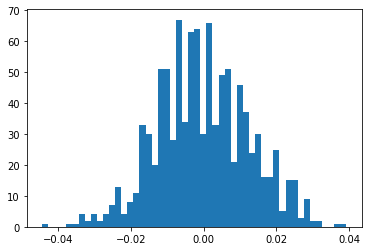

In [139]:
plt.hist(null_metric_samples, bins=50)

In [49]:
print(np.sqrt(np.var(ee.get_group_a_samples())))
print(np.sqrt(np.var(ee.get_group_b_samples_by_spec())))
print(np.sqrt(np.var(ee.get_group_b_samples_by_effect(0))))

0.49983356496190606
0.45703138296584356
0.49990387388164553


In [53]:
print(np.sqrt(2 * np.var(ee.get_group_a_samples())/ (2757+793+635+512)))
print(np.sqrt(np.var(ee.get_group_a_samples())/ (2757+793+635+512) + 
              np.var(ee.get_group_b_samples_by_spec()) / (2757+793+635+512)))

0.010317368455600839
0.009901311293983145


In [51]:
print(np.sqrt(np.var(ee.get_group_b_samples_by_effect(0))))

0.49999760372859836


In [140]:
null_critical_value

0.024793601651186777

(0.0, 1.0)

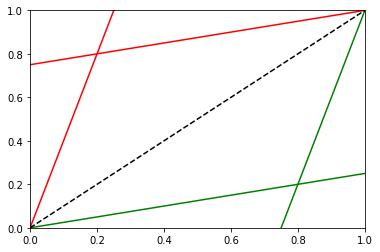

In [175]:
r = 4

plt.plot(np.linspace(0, 1, 101), np.linspace(0, 1, 101) / r, c='g')
plt.plot(np.linspace(0, 1, 101), r * np.linspace(0, 1, 101), c='r')

plt.plot(np.linspace(0, 1, 101), 1 - r + r * np.linspace(0, 1, 101), c='g')
plt.plot(np.linspace(0, 1, 101), (r - 1 + np.linspace(0, 1, 101)) / r, c='r')

plt.plot(np.linspace(0, 1, 101), np.linspace(0, 1, 101), '--', c='black')

plt.xlim(0, 1)
plt.ylim(0, 1)

In [34]:
np.linspace(0, 1, 101)

array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
       0.05050505, 0.06060606, 0.07070707, 0.08080808, 0.09090909,
       0.1010101 , 0.11111111, 0.12121212, 0.13131313, 0.14141414,
       0.15151515, 0.16161616, 0.17171717, 0.18181818, 0.19191919,
       0.2020202 , 0.21212121, 0.22222222, 0.23232323, 0.24242424,
       0.25252525, 0.26262626, 0.27272727, 0.28282828, 0.29292929,
       0.3030303 , 0.31313131, 0.32323232, 0.33333333, 0.34343434,
       0.35353535, 0.36363636, 0.37373737, 0.38383838, 0.39393939,
       0.4040404 , 0.41414141, 0.42424242, 0.43434343, 0.44444444,
       0.45454545, 0.46464646, 0.47474747, 0.48484848, 0.49494949,
       0.50505051, 0.51515152, 0.52525253, 0.53535354, 0.54545455,
       0.55555556, 0.56565657, 0.57575758, 0.58585859, 0.5959596 ,
       0.60606061, 0.61616162, 0.62626263, 0.63636364, 0.64646465,
       0.65656566, 0.66666667, 0.67676768, 0.68686869, 0.6969697 ,
       0.70707071, 0.71717172, 0.72727273, 0.73737374, 0.74747